In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly
import warnings
from plotly.offline import download_plotlyjs, init_notebook_mode, plot,iplot
import plotly.graph_objects as go
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
bank = pd .read_csv('bank-marketing.csv')

In [3]:
bank

age  age group eligible           job  salary   marital  education  \
0       58          5        Y    management  100000   married   tertiary   
1       44          4        Y    technician   60000    single  secondary   
2       33          3        Y  entrepreneur  120000   married  secondary   
3       47          4        Y   blue-collar   20000   married    unknown   
4       33          3        Y       unknown       0    single    unknown   
...    ...        ...      ...           ...     ...       ...        ...   
45206   51          5        Y    technician   60000   married   tertiary   
45207   71          7        N       retired   55000  divorced    primary   
45208   72          7        N       retired   55000   married  secondary   
45209   57          5        Y   blue-collar   20000   married  secondary   
45210   37          3        Y  entrepreneur  120000   married  secondary   

       marital-education targeted default  ...    contact day month duration  \
0       married-tertiary      yes      no  ...    unknown   5   may      261   
1       single-secondary      yes      no  ...    unknown   5   may      151   
2      married-secondary      yes      no  ...    unknown   5   may       76   
3        married-unknown       no      no  ...    unknown   5   may       92   
4         single-unknown       no      no  ...    unknown   5   may      198   
...                  ...      ...     ...  ...        ...  ..   ...      ...   
45206   married-tertiary      yes      no  ...   cellular  17   nov      977   
45207   divorced-primary      yes      no  ...   cellular  17   nov      456   
45208  married-secondary      yes      no  ...   cellular  17   nov     1127   
45209  married-secondary      yes      no  ...  telephone  17   nov      508   
45210  married-secondary      yes      no  ...   cellular  17   nov      361   

       campaign pdays  previous  poutcome    y  response  
0             1    -1         0   unknown   no         0  
1             1    -1         0   unknown   no         0  
2             1    -1         0   unknown   no         0  
3             1    -1         0   unknown   no         0  
4             1    -1         0   unknown   no         0  
...         ...   ...       ...       ...  ...       ...  
45206         3    -1         0   unknown  yes         1  
45207         2    -1         0   unknown  yes         1  
45208         5   184         3   success  yes         1  
45209         4    -1         0   unknown   no         0  
45210         2   188        11     other   no         0  

[45211 rows x 23 columns]

In [4]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                45211 non-null  int64 
 1   age group          45211 non-null  int64 
 2   eligible           45211 non-null  object
 3   job                45211 non-null  object
 4   salary             45211 non-null  int64 
 5   marital            45211 non-null  object
 6   education          45211 non-null  object
 7   marital-education  45211 non-null  object
 8   targeted           45211 non-null  object
 9   default            45211 non-null  object
 10  balance            45211 non-null  int64 
 11  housing            45211 non-null  object
 12  loan               45211 non-null  object
 13  contact            45211 non-null  object
 14  day                45211 non-null  int64 
 15  month              45211 non-null  object
 16  duration           45211 non-null  int64

In [5]:
bank.describe()

age     age group         salary        balance           day  \
count  45211.000000  45211.000000   45211.000000   45211.000000  45211.000000   
mean      40.936210      3.645861   57006.171065    1362.272058     15.806419   
std       10.618762      1.083271   32085.718415    3044.765829      8.322476   
min       18.000000      1.000000       0.000000   -8019.000000      1.000000   
25%       33.000000      3.000000   20000.000000      72.000000      8.000000   
50%       39.000000      3.000000   60000.000000     448.000000     16.000000   
75%       48.000000      4.000000   70000.000000    1428.000000     21.000000   
max       95.000000      9.000000  120000.000000  102127.000000     31.000000   

           duration      campaign         pdays      previous      response  
count  45211.000000  45211.000000  45211.000000  45211.000000  45211.000000  
mean     258.163080      2.763841     40.197828      0.580323      0.116985  
std      257.527812      3.098021    100.128746      2.303441      0.321406  
min        0.000000      1.000000     -1.000000      0.000000      0.000000  
25%      103.000000      1.000000     -1.000000      0.000000      0.000000  
50%      180.000000      2.000000     -1.000000      0.000000      0.000000  
75%      319.000000      3.000000     -1.000000      0.000000      0.000000  
max     4918.000000     63.000000    871.000000    275.000000      1.000000

In [6]:
bank.drop('marital-education', axis= 1, inplace=True)

In [7]:
bank = bank.loc[bank["balance"] != 0]

In [8]:
bank.drop('y', axis= 1, inplace=True)

In [20]:
bank = bank.loc[bank["balance"] != 0]

In [21]:
bank.head()

age  age group  eligible           job  salary  marital  education  \
0   58          5         1    management  100000  married   tertiary   
1   44          4         1    technician   60000   single  secondary   
2   33          3         1  entrepreneur  120000  married  secondary   
3   47          4         1   blue-collar   20000  married    unknown   
4   33          3         1       unknown       0   single    unknown   

   targeted  default  balance  ...  loan  contact day  month duration  \
0         1        0     2143  ...     0  unknown   5    may      261   
1         1        0       29  ...     0  unknown   5    may      151   
2         1        0        2  ...     1  unknown   5    may       76   
3         0        0     1506  ...     0  unknown   5    may       92   
4         0        0        1  ...     0  unknown   5    may      198   

   campaign  pdays  previous  poutcome response  
0         1     -1         0   unknown        0  
1         1     -1         0   unknown        0  
2         1     -1         0   unknown        0  
3         1     -1         0   unknown        0  
4         1     -1         0   unknown        0  

[5 rows x 21 columns]

In [22]:
bank.shape

(41697, 21)

In [23]:
boolean_columns=[ 'targeted','default','loan','housing']

encode={'yes':1,
       'no':0,}

for col in boolean_columns:
    bank[col]=bank[col].apply(lambda x : encode[x])

KeyError: 1

In [ ]:
b_col=['eligible']
encode={'Y':1,
       'N':0,}

for col in b_col:
    bank[col]=bank[col].apply(lambda x : encode[x])

In [25]:
bank.head()

age  age group  eligible           job  salary  marital  education  \
0   58          5         1    management  100000  married   tertiary   
1   44          4         1    technician   60000   single  secondary   
2   33          3         1  entrepreneur  120000  married  secondary   
3   47          4         1   blue-collar   20000  married    unknown   
4   33          3         1       unknown       0   single    unknown   

   targeted  default  balance  ...  loan  contact day  month duration  \
0         1        0     2143  ...     0  unknown   5    may      261   
1         1        0       29  ...     0  unknown   5    may      151   
2         1        0        2  ...     1  unknown   5    may       76   
3         0        0     1506  ...     0  unknown   5    may       92   
4         0        0        1  ...     0  unknown   5    may      198   

   campaign  pdays  previous  poutcome response  
0         1     -1         0   unknown        0  
1         1     -1         0   unknown        0  
2         1     -1         0   unknown        0  
3         1     -1         0   unknown        0  
4         1     -1         0   unknown        0  

[5 rows x 21 columns]

<AxesSubplot:xlabel='job', ylabel='count'>

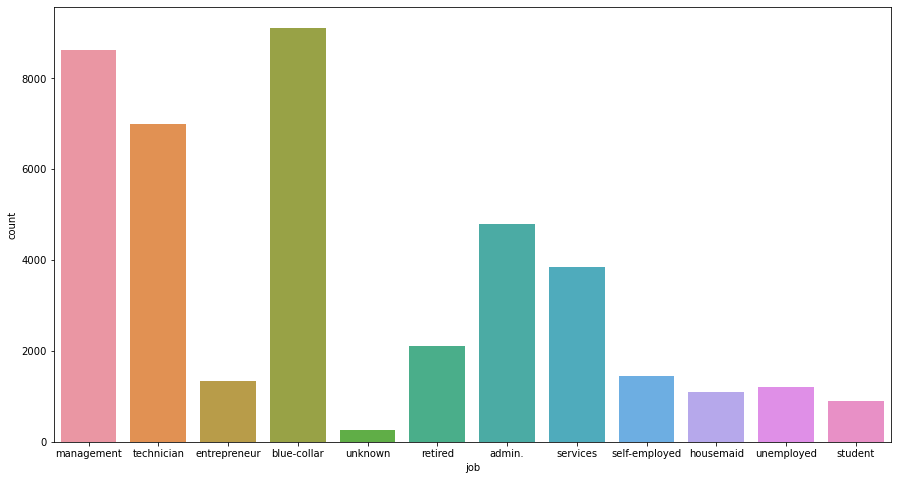

In [13]:
plt.figure(figsize=(15,8))
sns.countplot(bank.job)

In [14]:
plt.figure(figsize=(15,8))

<Figure size 1080x576 with 0 Axes>

<Figure size 1080x576 with 0 Axes>

(array([4.5000e+01, 4.9600e+03, 1.6644e+04, 1.0720e+04, 0.0000e+00,
        7.6850e+03, 1.1330e+03, 4.0000e+02, 1.0200e+02, 8.0000e+00]),
 array([1. , 1.8, 2.6, 3.4, 4.2, 5. , 5.8, 6.6, 7.4, 8.2, 9. ]),
 <BarContainer object of 10 artists>)

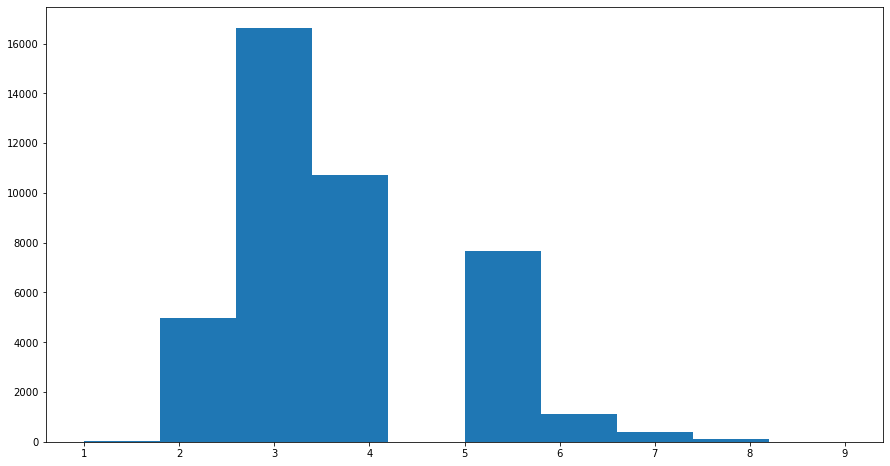

In [15]:
plt.figure(figsize=(15,8))
plt.hist(bank['age group'])


In [16]:
plt.figure(figsize=(15,8))
sns.set_style(style='whitegrid')
px.scatter(bank,x="age group",y="poutcome",color='response' )

<Figure size 1080x576 with 0 Axes>

<Figure size 4320x2880 with 0 Axes>

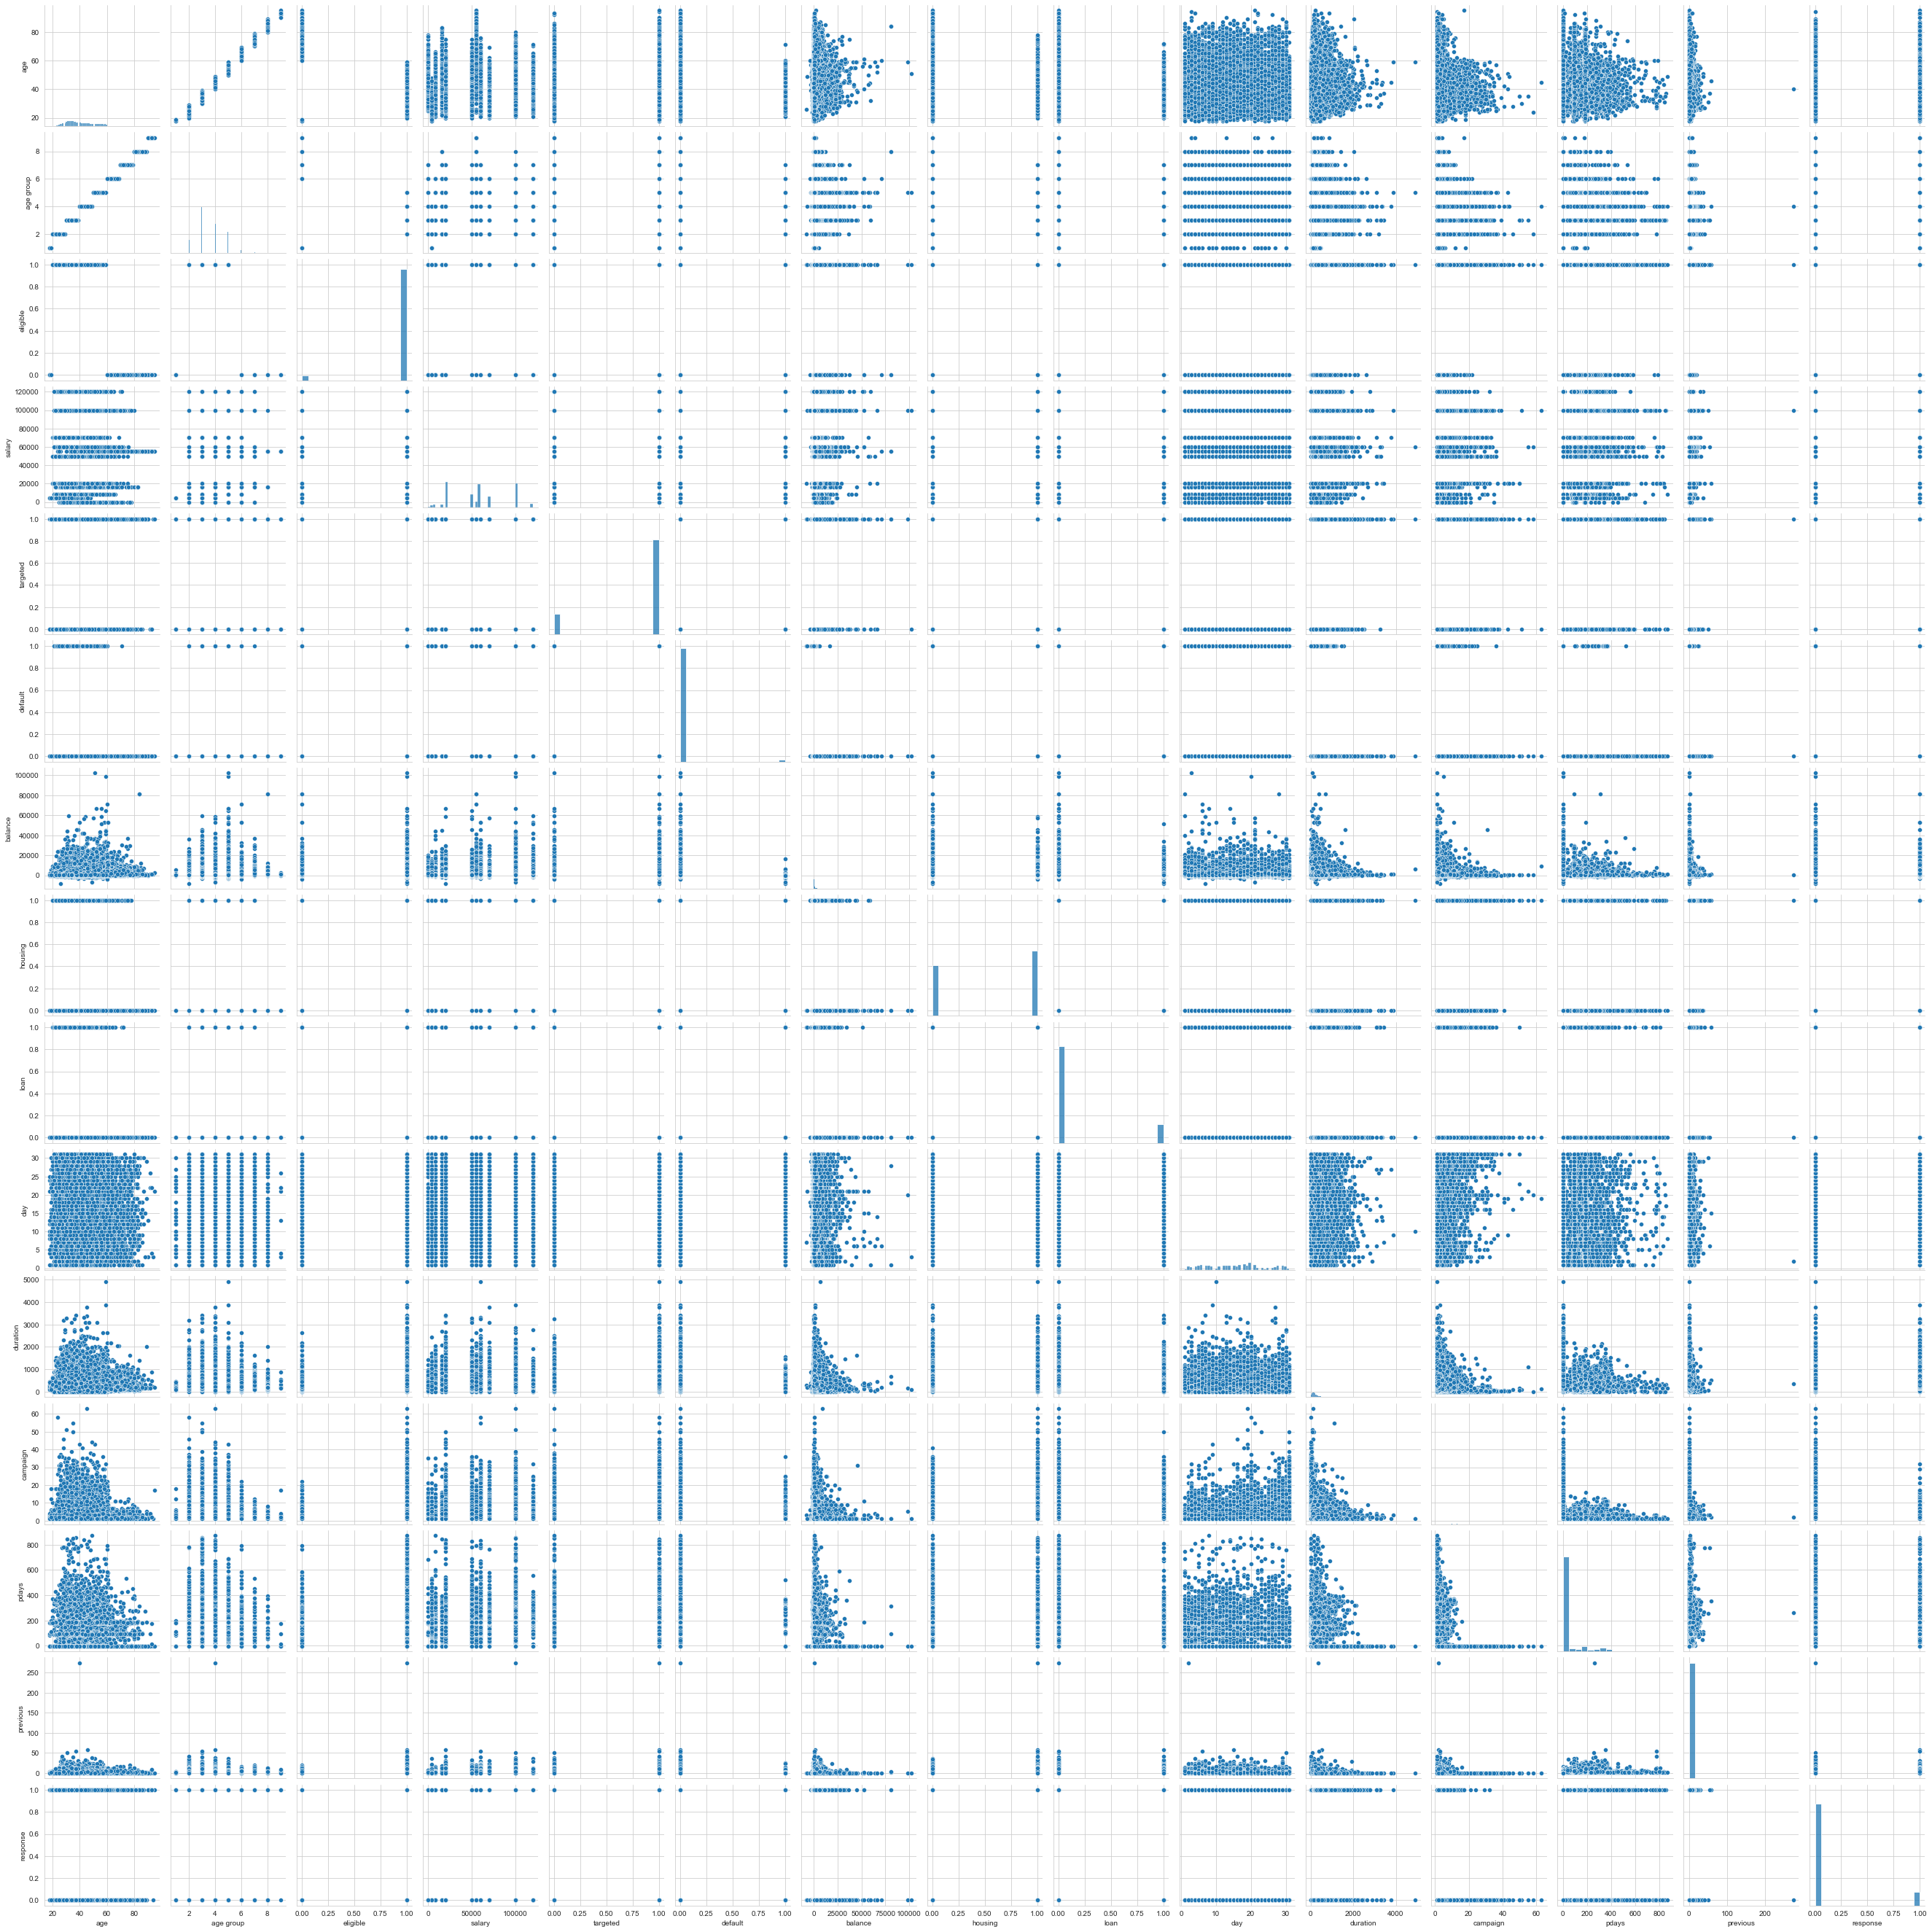

In [17]:
plt.figure(figsize=(60,40))
sns.pairplot(bank)

In [68]:
x=bank[['targeted','default','loan','housing','eligible','age group','campaign','previous']]
y=bank.response

In [69]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.8)

In [70]:
from sklearn.linear_model import LogisticRegression

In [71]:
model=LogisticRegression()

In [72]:
model.fit(x_train,y_train)

LogisticRegression()

In [73]:
model.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [74]:

model.score(x_test,y_test)

0.8816546762589929

In [75]:
val=[[1,1,1,1,1,1,4,15,0]

In [76]:
model.predict(val)

ValueError: Expected 2D array, got 1D array instead:
array=[ 1  1  1  1  1  1  4 15  0].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.